In [947]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.vq import vq, whiten
from scipy import stats
from sklearn.cluster import KMeans

%matplotlib inline

from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

from kneed import KneeLocator
#pip install the package

In [948]:
data = pd.read_csv('BathSoapHousehold.csv')

data.columns = [line.strip().replace(' ', '_') for line in data.columns] 
data.columns = [line.strip().replace('.', '') for line in data.columns] 
data["Member_id"]= data["Member_id"].astype(str)

data.set_index('Member_id', inplace=True)
pd.set_option('display.max_columns', None)

In [949]:
data.head()

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence_Index,No_of_Brands,Brand_Runs,Total_Volume,No_of__Trans,Value,Trans_/_Brand_Runs,Vol/Tran,Avg_Price,Pur_Vol_No_Promo_-_%,Pur_Vol_Promo_6_%,Pur_Vol_Other_Promo_%,"Br_Cd_57,_144",Br_Cd_55,Br_Cd_272,Br_Cd_286,Br_Cd_24,Br_Cd_481,Br_Cd_352,Br_Cd_5,Max_brand,Others_999,Pr_Cat_1,Pr_Cat_2,Pr_Cat_3,Pr_Cat_4,PropCat_5,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15,MaxProp,MaxPropCat
Member_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1010010,4,3,10,1,4,4,2,4,1,2,3,17,8025,24,818.0,1.41,334.38,10.19,1.000000,0.000000,0.000000,0.376947,0.130841,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.376947,0.492212,0.233645,0.560748,0.130841,0.074766,0.501558,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.028037,0.0,0.130841,0.339564,0.501558,5
1010020,3,2,10,2,2,4,4,2,1,19,5,25,13975,40,1681.5,1.60,349.38,12.03,0.887299,0.096601,0.016100,0.021467,0.075134,0.0,0.000000,0.0,0.059034,0.0,0.144902,0.144902,0.699463,0.293381,0.547406,0.094812,0.064401,0.456172,0.347048,0.026834,0.016100,0.014311,0.0,0.059034,0.000000,0.0,0.080501,0.000000,0.456172,5
1014020,2,3,10,2,4,5,6,4,1,23,5,37,23100,63,1950.0,1.70,366.67,8.44,0.941558,0.019481,0.038961,0.025974,0.545455,0.0,0.030303,0.0,0.000000,0.0,0.019481,0.545455,0.378788,0.120130,0.318182,0.561688,0.000000,0.244589,0.121212,0.033550,0.010823,0.008658,0.0,0.000000,0.016234,0.0,0.561688,0.003247,0.561688,14
1014030,4,0,0,0,4,0,0,5,0,0,2,4,1500,4,114.0,1.00,375.00,7.60,1.000000,0.000000,0.000000,0.400000,0.600000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.600000,0.000000,0.000000,0.400000,0.600000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.600000,0.000000,0.600000,14
1014190,4,1,10,2,3,4,4,3,1,10,3,6,8300,13,591.0,2.17,638.46,7.12,0.614458,0.144578,0.240964,0.048193,0.144578,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.144578,0.807229,0.000000,0.048193,0.144578,0.807229,0.807229,0.000000,0.000000,0.048193,0.000000,0.0,0.000000,0.000000,0.0,0.144578,0.000000,0.807229,5


In [950]:
# Renaming some columns
data.rename(columns={'Memberid':'Member_id','SEC': 'Socio_Economic_Class','FEH':'Food_eating_habits', 'MT': 'Native_language', 'HS':'Household_members'}, inplace=True)

In [951]:
# Descriptive statistics of the original DataFrame
data.describe()

,Socio_Economic_Class,Food_eating_habits,Native_language,SEX,AGE,EDU,Household_members,CHILD,CS,Affluence_Index,No_of_Brands,Brand_Runs,Total_Volume,No_of__Trans,Value,Trans_/_Brand_Runs,Vol/Tran,Avg_Price,Pur_Vol_No_Promo_-_%,Pur_Vol_Promo_6_%,Pur_Vol_Other_Promo_%,"Br_Cd_57,_144",Br_Cd_55,Br_Cd_272,Br_Cd_286,Br_Cd_24,Br_Cd_481,Br_Cd_352,Br_Cd_5,Max_brand,Others_999,Pr_Cat_1,Pr_Cat_2,Pr_Cat_3,Pr_Cat_4,PropCat_5,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15,MaxProp,MaxPropCat
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,2.500000,2.048333,8.178333,1.738333,3.213333,4.043333,4.191667,3.233333,0.931667,17.02000,3.636667,15.751667,11914.770000,31.153333,1337.386433,2.617783,415.051217,11.834717,0.913008,0.053500,0.033492,0.183822,0.129347,0.033155,0.033948,0.019321,0.025923,0.034232,0.018186,0.371216,0.521992,0.279037,0.493142,0.139204,0.088618,0.457164,0.092324,0.096909,0.080148,0.030806,0.020248,0.029367,0.006217,0.024938,0.136481,0.025398,0.667449,7.121667
std,1.118967,1.134964,4.294641,0.648510,0.865489,2.190004,2.300090,1.217110,0.507372,11.41008,1.579709,10.396481,7770.374508,17.427258,883.155463,2.604683,248.761232,3.742725,0.119490,0.092987,0.071985,0.236427,0.259727,0.090960,0.112892,0.079768,0.089362,0.121559,0.067905,0.285273,0.297324,0.280887,0.311586,0.268034,0.191686,0.316348,0.166330,0.195760,0.152564,0.062816,0.076657,0.098467,0.026312,0.095448,0.266045,0.087592,0.204531,3.376270
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,150.000000,1.000000,20.000000,1.000000,94.430000,5.620000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.214716,5.000000
25%,1.750000,1.000000,4.000000,2.000000,3.000000,3.000000,3.000000,2.000000,1.000000,10.00000,2.000000,8.000000,6825.000000,22.000000,789.562500,1.420000,250.515000,9.760000,0.878563,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133622,0.278918,0.056671,0.208407,0.000000,0.000000,0.159766,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.496705,5.000000
50%,2.500000,3.000000,10.000000,2.000000,3.000000,4.500000,4.000000,4.000000,1.000000,15.00000,3.000000,15.000000,10360.000000,28.000000,1216.000000,1.845000,361.525000,11.250000,0.953468,0.000000,0.000000,0.080349,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.299495,0.525096,0.180844,0.524981,0.000000,0.000000,0.444444,0.020155,0.012601,0.007750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.665423,5.000000
75%,3.250000,3.000000,10.000000,2.000000,4.000000,5.000000,5.000000,4.000000,1.000000,24.00000,5.000000,21.000000,15343.750000,40.000000,1675.750000,2.690000,490.890000,13.417500,1.000000,0.068182,0.043783,0.282434,0.094904,0.019139,0.000000,0.000000,0.006101,0.000000,0.009526,0.571557,0.778356,0.419852,0.747587,0.122525,0.070732,0.720000,0.103679,0.082935,0.086341,0.031645,0.000000,0.007739,0.000000,0.005522,0.118416,0.000000,0.834396,8.000000
max,4.000000,3.000000,19.000000,2.000000,4.000000,9.000000,15.000000,5.000000,2.000000,53.00000,9.000000,74.000000,50895.000000,138.000000,6371.850000,23.000000,2525.000000,33.330000,1.000000,0.666667,1.000000,1.000000,1.000000,0.963636,1.000000,1.000

In [952]:
# Unique values for each variable

uniqueValues = data.nunique()
print('Count of unique values each column :')
print(uniqueValues)

Count of unique values each column :
Socio_Economic_Class       4
Food_eating_habits         4
Native_language           15
SEX                        3
AGE                        4
EDU                       10
Household_members         13
CHILD                      5
CS                         3
Affluence_Index           53
No_of_Brands               9
Brand_Runs                51
Total_Volume             457
No_of__Trans              80
Value                    571
Trans_/_Brand_Runs       217
Vol/Tran                 559
Avg_Price                470
Pur_Vol_No_Promo_-_%     386
Pur_Vol_Promo_6_%        294
Pur_Vol_Other_Promo_%    255
Br_Cd_57,_144            401
Br_Cd_55                 227
Br_Cd_272                196
Br_Cd_286                135
Br_Cd_24                 139
Br_Cd_481                155
Br_Cd_352                143
Br_Cd_5                  168
Max_brand                547
Others_999               547
Pr_Cat_1                 514
Pr_Cat_2                 529
Pr_Cat

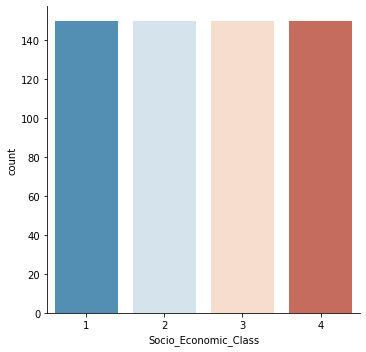

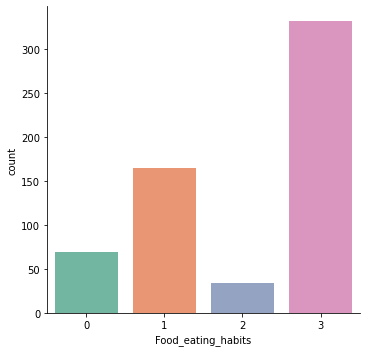

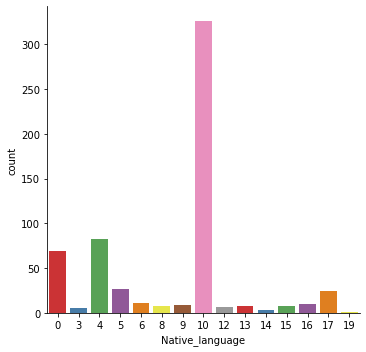

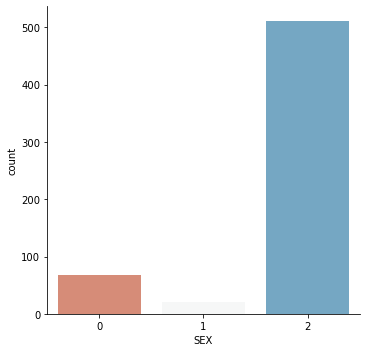

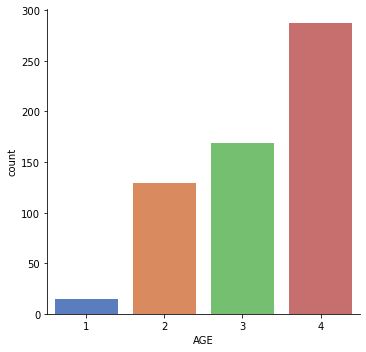

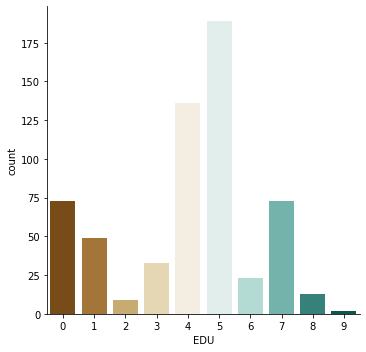

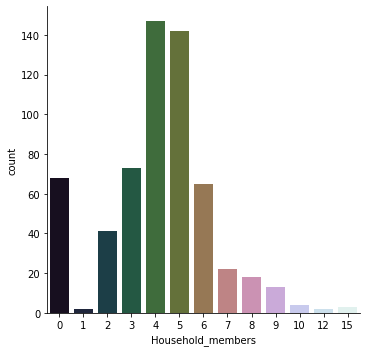

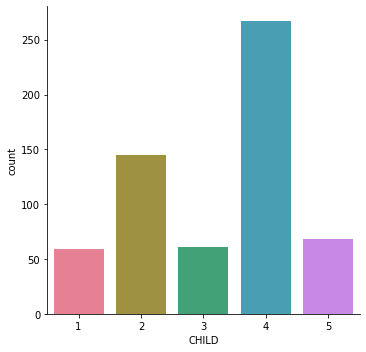

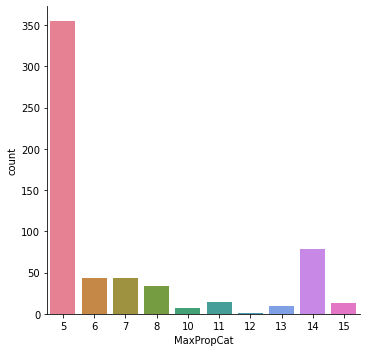

In [953]:
# Frequencies for categorical data

sns.catplot(x="Socio_Economic_Class", kind="count", palette="RdBu_r", data=data) # to increase size insert: ,height=8.27, aspect=11.7/8.27)
sns.catplot(x="Food_eating_habits", kind="count", palette="Set2", data=data)
sns.catplot(x="Native_language", kind="count", palette="Set1", data=data)
sns.catplot(x="SEX", kind="count", palette="RdBu", data=data)
sns.catplot(x="AGE", kind="count", palette="muted", data=data)
sns.catplot(x="EDU", kind="count", palette="BrBG", data=data)
sns.catplot(x="Household_members", kind="count", palette="cubehelix", data=data)
sns.catplot(x="CHILD", kind="count", palette="husl", data=data)
sns.catplot(x='MaxPropCat', kind="count", palette="husl", data=data)
plt.show()



In [954]:
#using whiten function to create a normalized DataFrame

norm_df = whiten(data)

In [955]:
# Indexing the data

norm_df = pd.DataFrame(norm_df, index= data.index, columns= data.columns)
norm_df.head()

,Socio_Economic_Class,Food_eating_habits,Native_language,SEX,AGE,EDU,Household_members,CHILD,CS,Affluence_Index,No_of_Brands,Brand_Runs,Total_Volume,No_of__Trans,Value,Trans_/_Brand_Runs,Vol/Tran,Avg_Price,Pur_Vol_No_Promo_-_%,Pur_Vol_Promo_6_%,Pur_Vol_Other_Promo_%,"Br_Cd_57,_144",Br_Cd_55,Br_Cd_272,Br_Cd_286,Br_Cd_24,Br_Cd_481,Br_Cd_352,Br_Cd_5,Max_brand,Others_999,Pr_Cat_1,Pr_Cat_2,Pr_Cat_3,Pr_Cat_4,PropCat_5,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15,MaxProp,MaxPropCat
Member_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1010010,3.577709,2.64546,2.330426,1.543284,4.625523,1.828005,0.870257,3.289215,1.972585,0.175430,1.900668,1.636533,1.033630,1.378302,0.926997,0.541784,1.345302,2.724887,8.375911,0.000000,0.000000,1.595681,0.504185,0.0,0.00000,0.0,0.000000,0.0,0.000000,1.322457,1.656853,0.832505,1.801156,0.488558,0.390371,1.586783,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.066444,0.0,0.492211,3.879889,2.454278,1.482160
1010020,2.683282,1.76364,2.330426,3.086567,2.312761,1.828005,1.740513,1.644607,1.972585,1.666584,3.167780,2.406666,1.799998,2.297170,1.905557,0.614791,1.405651,3.216918,7.431935,1.039728,0.223845,0.090873,0.289523,0.0,0.00000,0.0,0.661169,0.0,2.135679,0.508364,2.354490,1.045352,1.758302,0.354026,0.336250,1.443195,2.088242,0.137188,0.105619,0.228019,0.0,0.600029,0.000000,0.0,0.302836,0.000000,2.232191,1.482160
1014020,1.788854,2.64546,2.330426,3.086567,4.625523,2.285006,2.610770,3.289215,1.972585,2.017443,3.167780,3.561866,2.975310,3.618043,2.209834,0.653215,1.475214,2.256923,7.886409,0.209671,0.541686,0.109953,2.101861,0.0,0.26865,0.0,0.000000,0.0,0.287120,1.913638,1.275052,0.428037,1.022020,2.097331,0.000000,0.773808,0.729352,0.171525,0.070997,0.137947,0.0,0.000000,0.617475,0.0,2.113013,0.037098,2.748517,4.150048
1014030,3.577709,0.00000,0.000000,0.000000,4.625523,0.000000,0.000000,4.111518,0.000000,0.000000,1.267112,0.385067,0.193202,0.229717,0.129190,0.384244,1.508727,2.032300,8.375911,0.000000,0.000000,1.693269,2.312047,0.0,0.00000,0.0,0.000000,0.0,0.000000,2.105002,0.000000,0.000000,1.284825,2.240386,0.000000,1.265484,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,2.257138,0.000000,2.935988,4.150048
1014190,3.577709,0.88182,2.330426,3.086567,3.469142,1.828005,1.740513,2.466911,1.972585,0.877149,1.900668,0.577600,1.069051,0.746580,0.669750,0.833810,2.568699,1.903945,5.146644,1.556113,3.350188,0.204008,0.557120,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.507229,2.717244,0.000000,0.154798,0.539852,4.214715,2.553838,0.000000,0.000000,0.316150,0.000000,0.0,0.000000,0.000000,0.0,0.543889,0.000000,3.950024,1.482160


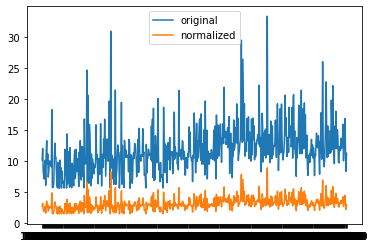

In [956]:
#Plotting the original variable 'Avg_Price' against the normalized.

# Plot original data
plt.plot(data['Avg_Price'], label = 'original')

# Plot normalized data
plt.plot(norm_df['Avg_Price'], label='normalized')

plt.rcParams["figure.figsize"] = 20,6

plt.legend()
plt.show()

# Hints
Step 1: Assess the variables that are important for determining 'Purchase Behavior' (including brand loyalty). Come up with some k-means cluster variations (try k=2,3,4). Review the final results to understand what determines the differences in each of the clusters and how would you interpret the results for the business? Do they make sense?

Step 2: Assess the variables that are important in determining 'Basis for Purchase'. Make sure you normalize the data.  Come up with some clusters (try k=2,3,4). Review the final results to understand what determines the differences in each of the clusters and how would you interpret the results for the business? Do they make sense?

Step 3: Take the variables you determined as important from Steps 1 and 2 and use them to come up with the final k-means cluster (try variations of k=3,4,5 etc).

Hint: If you are getting more than 50% of the clients in one cluster then you need to go back and re-evaluate the variables you came up with in Step 1 and 2. As the variables you came up with are not useful in partitioning the clients into the k clusters. 

Step 4: Come up with some persona's for the final k-means cluster (from Step 3). You can use the demographic variables to further profile the customers in each of the clusters. Remember this information would be used to guide the development of advertising and promotional campaigns. It must be relevant, informative and used to describe/provide a high level summary of the client profile e.g. behavior, loyalty, socio-economic status, gender etc.  


Purchase behavior (volume, frequency, susceptibility to discounts, and brand loyalty)

Basis of purchase (price, selling proposition)

Use    the    following    purchase    behavior    variables    to    create    your    clusters:    brands,    brand    runs,    total_volume,    num_trans,    value,    Avg_price,    brand_others,    and    max_single_brand.

Use    the    following    basis-­‐for-­‐purchase    variables    to    create    your    clusters:promo_brand,    promo_none,    promo_other,    all    price    categories,    prop_beauty,    and    prop_carbolic

In [957]:
data.columns

Index(['Socio_Economic_Class', 'Food_eating_habits', 'Native_language', 'SEX',
       'AGE', 'EDU', 'Household_members', 'CHILD', 'CS', 'Affluence_Index',
       'No_of_Brands', 'Brand_Runs', 'Total_Volume', 'No_of__Trans', 'Value',
       'Trans_/_Brand_Runs', 'Vol/Tran', 'Avg_Price', 'Pur_Vol_No_Promo_-_%',
       'Pur_Vol_Promo_6_%', 'Pur_Vol_Other_Promo_%', 'Br_Cd_57,_144',
       'Br_Cd_55', 'Br_Cd_272', 'Br_Cd_286', 'Br_Cd_24', 'Br_Cd_481',
       'Br_Cd_352', 'Br_Cd_5', 'Max_brand', 'Others_999', 'Pr_Cat_1',
       'Pr_Cat_2', 'Pr_Cat_3', 'Pr_Cat_4', 'PropCat_5', 'PropCat_6',
       'PropCat_7', 'PropCat_8', 'PropCat_9', 'PropCat_10', 'PropCat_11',
       'PropCat_12', 'PropCat_13', 'PropCat_14', 'PropCat_15', 'MaxProp',
       'MaxPropCat'],
      dtype='object')

In [958]:
# Choosing specific variables

purchase_behaviour= ['No_of_Brands','Total_Volume','Brand_Runs','No_of__Trans', 'Value', 'Avg_Price', 'Others_999','Max_brand']

basis_of_purchase= ['Pur_Vol_No_Promo_-_%', 'Pur_Vol_Promo_6_%', 'Pur_Vol_Other_Promo_%', 'Pr_Cat_1',
       'Pr_Cat_2', 'Pr_Cat_3', 'Pr_Cat_4', 'MaxPropCat']

mixed = ['Others_999','Max_brand','No_of_Brands','MaxPropCat', 'Pur_Vol_No_Promo_-_%','Pr_Cat_1','Pr_Cat_2', 'Pr_Cat_3', 'Pr_Cat_4',
       'Pur_Vol_Promo_6_%', 'Pur_Vol_Other_Promo_%', 'Brand_Runs','No_of__Trans']

step1_df = norm_df[purchase_behaviour]
step2_df = norm_df[basis_of_purchase]
step3_df = norm_df[mixed]

In [959]:
# Not necessary in our case

print("*****Missing values for purchase behaviour variables*****")
print(data[purchase_behaviour].isna().sum())
print("\n")
print("*****Missing values for basis of purchase variables*****")
print(data[basis_of_purchase].isna().sum())

*****Missing values for purchase behaviour variables*****
No_of_Brands    0
Total_Volume    0
Brand_Runs      0
No_of__Trans    0
Value           0
Avg_Price       0
Others_999      0
Max_brand       0
dtype: int64


*****Missing values for basis of purchase variables*****
Pur_Vol_No_Promo_-_%     0
Pur_Vol_Promo_6_%        0
Pur_Vol_Other_Promo_%    0
Pr_Cat_1                 0
Pr_Cat_2                 0
Pr_Cat_3                 0
Pr_Cat_4                 0
MaxPropCat               0
dtype: int64


# Step 1

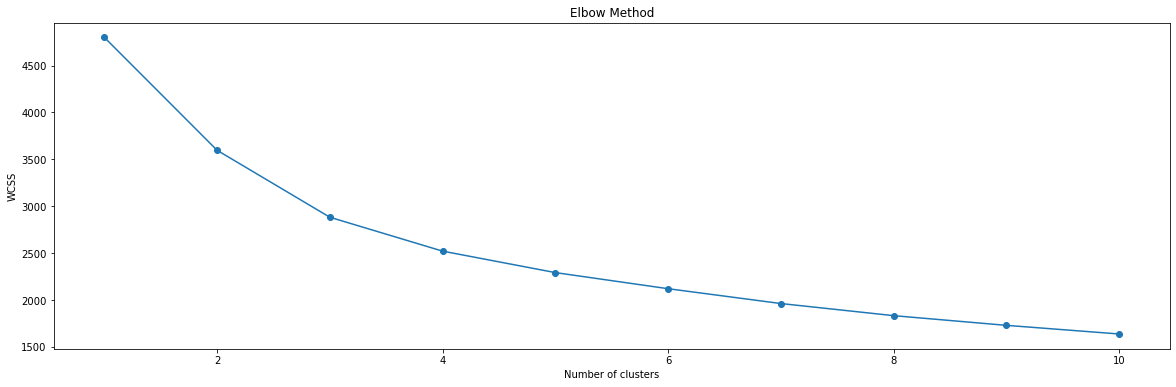

In [960]:
# From Web 1, Not part of the assignment

#Using the Elbow Method to find the most convenient number of clusters.
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init=10, random_state = 42)
    kmeans.fit(step1_df)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
    
# Plot the number of clusters
plt.plot(range(1, 11), wcss, marker='o',)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [961]:
# From Web 2, Not part of the assignment

kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing", interp_method="interp1d")

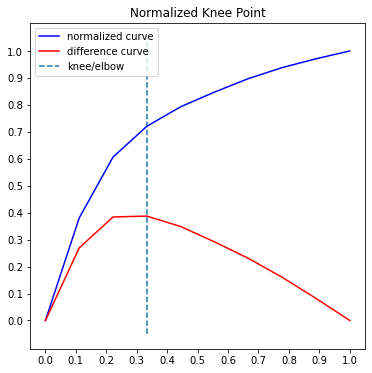

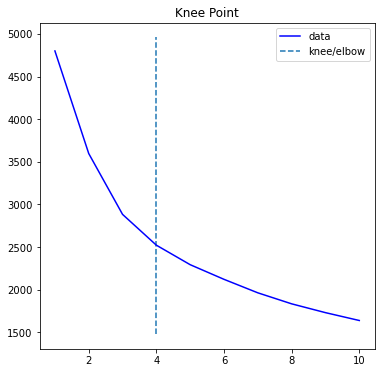

In [962]:
# From Web 3, Not part of the assignment

kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing", interp_method="interp1d")
kl.plot_knee_normalized()
kl.plot_knee()

In [963]:
# From Web 4, Not part of the assignment

#Displaying the ideal number of clusters
kmeans = KMeans(n_clusters=4, random_state=0).fit(step1_df)

kl.elbow

4

In [964]:
# Here you can see the individual members id's that belong to the various clusters
# Choose the number of clusters at: n_clusters=4

kmeans = KMeans(n_clusters=5, random_state=0).fit(step1_df)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=step1_df.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  1017360, 1034130, 1037290, 1037420, 1045120, 1047870, 1054110, 1057510, 1060150, 1060720, 1060760, 1060810, 1060920, 1062270, 1070040, 1070270, 1070310, 1070420, 1071010, 1071120, 1071460, 1071640, 1075060, 1075200, 1077300, 1077390, 1080080, 1080390, 1080950, 1081850, 1097410, 1100620, 1100790, 1104490, 1104740, 1110550, 1111180, 1111310, 1121660, 1140360, 1146450, 1146760, 1147390, 1150950, 1150970, 1151830, 1155820, 1157580, 1167340
1 :  1010010, 1014190, 1020210, 1024100, 1024630, 1025070, 1027580, 1027750, 1028050, 1028110, 1028230, 1030200, 1034350, 1040190, 1044140, 1045030, 1045060, 1047210, 1047220, 1047610, 1047650, 1047760, 1057580, 1058000, 1058190, 1060590, 1061580, 1061660, 1061820, 1061830, 1062120, 1065080, 1065780, 1070500, 1070660, 1070880, 1071500, 1071560, 1075280, 1077480, 1077570, 1080020, 1080250, 1080470, 1080820, 1081140, 1081260, 1085220, 1085340, 1085590, 1085630, 1090040, 1094030, 1094070, 1095140, 1095220, 1097540, 1101030, 1101070, 1104380, 1104510, 1

In [965]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=step1_df.columns)
pd.set_option('precision', 3)
print(centroids)
pd.set_option('precision', 6)

   No_of_Brands  Total_Volume  Brand_Runs  No_of__Trans  Value  Avg_Price  \
0         2.159         3.657       1.426         2.183  3.491      2.927   
1         1.573         0.938       1.028         1.190  0.959      3.354   
2         1.770         1.305       0.722         1.215  1.062      2.702   
3         2.951         1.390       2.000         2.057  1.511      3.420   
4         3.635         2.326       3.357         3.606  2.473      3.293   

   Others_999  Max_brand  
0       1.712      1.407  
1       2.716      0.545  
2       0.552      2.642  
3       1.888      0.954  
4       2.087      0.738  


In [966]:
# From the book

withinClusterSS = [0] * 6
clusterCount = [0] * 7
for cluster, distance in zip(kmeans.labels_, kmeans.transform(step1_df)):
    withinClusterSS[cluster] += distance[cluster]**2
    clusterCount[cluster] += 1
for cluster, withClustSS in enumerate(withinClusterSS):
    print('Cluster {} ({} members): {:5.2f} within cluster'.format(cluster, 
        clusterCount[cluster], withinClusterSS[cluster]))

Cluster 0 (49 members): 328.44 within cluster
Cluster 1 (151 members): 548.23 within cluster
Cluster 2 (155 members): 533.05 within cluster
Cluster 3 (184 members): 529.50 within cluster
Cluster 4 (61 members): 353.10 within cluster
Cluster 5 (0 members):  0.00 within cluster


In [967]:
# calculate the distances of each data point to the cluster centers
distances = kmeans.transform(step1_df)

# reduce to the minimum squared distance of each data point to the cluster centers
minSquaredDistances = distances.min(axis=1) ** 2

# combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmeans.labels_}, 
    index=step1_df.index)

# Group by cluster and print information
for cluster, data in df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')

Cluster 0 (49 members): 328.44 within cluster 
Cluster 1 (151 members): 548.23 within cluster 
Cluster 2 (155 members): 533.05 within cluster 
Cluster 3 (184 members): 529.50 within cluster 
Cluster 4 (61 members): 353.10 within cluster 


,No_of_Brands,Total_Volume,Brand_Runs,No_of__Trans,Value,Avg_Price,Others_999,Max_brand,cluster
0,2.159262,3.656984,1.426318,2.183484,3.491176,2.926807,1.711537,1.406793,Cluster 0
1,1.573401,0.938356,1.028332,1.190041,0.959052,3.354376,2.716000,0.545462,Cluster 1
2,1.769870,1.304562,0.722310,1.214907,1.062140,2.702166,0.551701,2.641899,Cluster 2
3,2.950856,1.390093,1.999626,2.057153,1.510845,3.419639,1.888464,0.954272,Cluster 3
4,3.635158,2.326468,3.356708,3.605804,2.472833,3.292537,2.086653,0.738232,Cluster 4


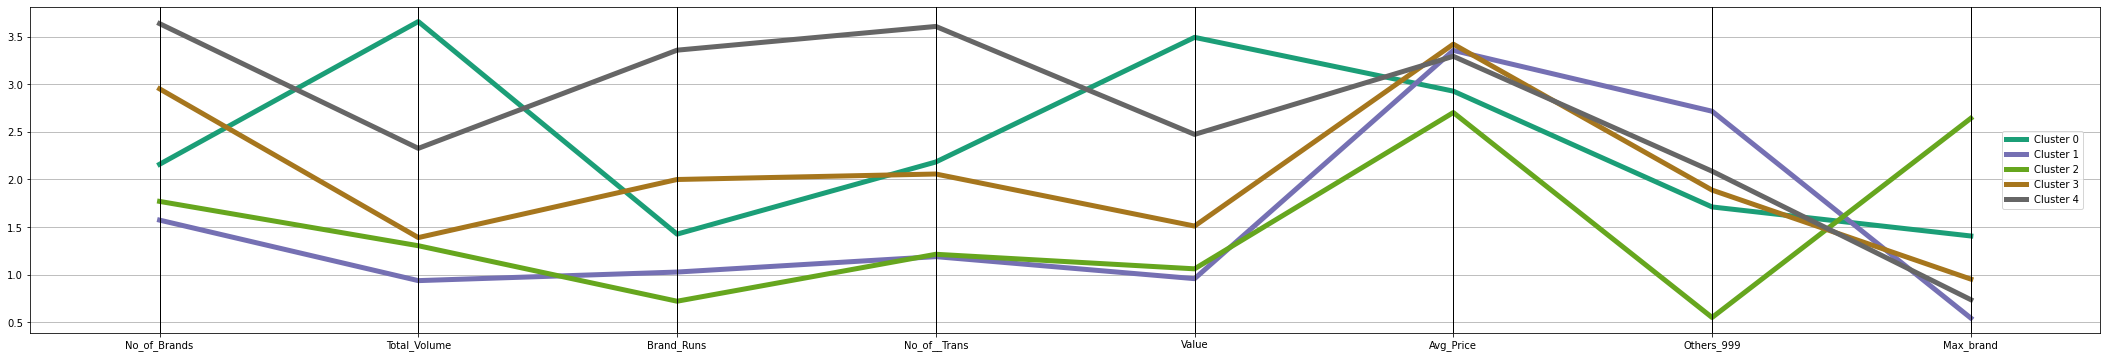

In [968]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]

fig = plt.figure(figsize=(10, 6))
#plt.figure(figsize=(10,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)
centroids
#plt.show()

In [969]:
# Here we see the clusters for our variables of interest only

step1_df.groupby(kmeans.labels_).mean()

,No_of_Brands,Total_Volume,Brand_Runs,No_of__Trans,Value,Avg_Price,Others_999,Max_brand
0,2.159262,3.656984,1.426318,2.183484,3.491176,2.926807,1.711537,1.406793
1,1.573401,0.938356,1.028332,1.190041,0.959052,3.354376,2.716000,0.545462
2,1.769870,1.304562,0.722310,1.214907,1.062140,2.702166,0.551701,2.641899
3,2.950856,1.390093,1.999626,2.057153,1.510845,3.419639,1.888464,0.954272
4,3.635158,2.326468,3.356708,3.605804,2.472833,3.292537,2.086653,0.738232


In [970]:
# Here we see the clusters for all the variables in the dataframe

# Showing all columns
pd.set_option('display.max_columns', None)

norm_df.groupby(kmeans.labels_).mean()

,Socio_Economic_Class,Food_eating_habits,Native_language,SEX,AGE,EDU,Household_members,CHILD,CS,Affluence_Index,No_of_Brands,Brand_Runs,Total_Volume,No_of__Trans,Value,Trans_/_Brand_Runs,Vol/Tran,Avg_Price,Pur_Vol_No_Promo_-_%,Pur_Vol_Promo_6_%,Pur_Vol_Other_Promo_%,"Br_Cd_57,_144",Br_Cd_55,Br_Cd_272,Br_Cd_286,Br_Cd_24,Br_Cd_481,Br_Cd_352,Br_Cd_5,Max_brand,Others_999,Pr_Cat_1,Pr_Cat_2,Pr_Cat_3,Pr_Cat_4,PropCat_5,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15,MaxProp,MaxPropCat
0,2.445985,2.267537,2.301891,3.023576,4.011933,1.921271,2.752853,2.483693,2.012842,1.553807,2.159262,1.426318,3.656984,2.183484,3.491176,1.273338,3.436085,2.926807,7.808511,0.381741,0.448719,0.898882,0.489095,0.257902,0.375009,0.239199,0.525380,0.054109,0.206187,1.406793,1.711537,0.655180,1.820835,0.502143,0.599231,1.747064,0.645795,0.248860,0.273538,0.525634,0.115766,0.476797,0.102201,0.245972,0.485066,0.071149,3.412258,1.899585
1,2.167949,1.588444,1.753221,2.391579,3.614647,1.604044,1.403361,2.755534,1.672125,1.231494,1.573401,1.028332,0.938356,1.190041,0.959052,0.846584,1.491412,3.354376,7.576882,0.670326,0.460423,0.347766,0.106401,0.273419,0.160671,0.122876,0.131874,0.108625,0.083149,0.545462,2.716000,1.311364,1.319217,0.146689,0.950103,1.571695,0.585189,0.596995,0.680064,0.374772,0.484169,0.205839,0.402779,0.189638,0.140263,0.442234,3.417220,1.931716
2,2.464003,1.638479,1.674900,2.479210,3.625813,1.518424,1.681560,2.928462,1.705332,1.167457,1.769870,0.722310,1.304562,1.214907,1.062140,1.542456,1.918609,2.702166,7.870569,0.236166,0.533756,1.251854,1.308567,0.327056,0.284378,0.270302,0.364277,0.556070,0.256188,2.641899,0.551701,0.506386,1.564311,1.300359,0.118102,1.299492,0.224018,0.404995,0.249762,0.328766,0.097178,0.338218,0.060444,0.225898,1.307133,0.031756,4.035291,2.765424
3,2.061071,1.849905,1.989728,2.885269,3.739383,2.232848,1.842201,2.538416,2.026188,1.749532,2.950856,1.999626,1.390093,2.057153,1.510845,0.698092,1.282043,3.419639,7.532572,0.759115,0.419280,0.785857,0.224283,0.502195,0.380301,0.336485,0.291613,0.215158,0.403402,0.954272,1.888464,1.175874,1.707467,0.259776,0.359413,1.470225,0.707774,0.490762,0.661924,0.601820,0.274222,0.284120,0.193192,0.377706,0.244961,0.317873,2.745822,1.801147
4,2.184748,2.269603,2.299863,3.035968,3.886197,2.067743,2.425305,2.237744,1.875573,2.143983,3.635158,3.356708,2.326468,3.605804,2.472833,0.750221,1.230605,3.292537,7.470626,0.808012,0.458941,0.519623,0.244735,0.358422,0.391608,0.186348,0.301993,0.397885,0.397260,0.738232,2.086653,1.173348,1.726822,0.258387,0.333593,1.195499,0.792692,0.686188,0.637200,0.827103,0.234716,0.327036,0.510543,0.191668,0.252941,0.663053,2.388825,1.997271


In [971]:
print(pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')))

          0         1         2         3         4
0  0.000000  4.150277  3.992577  3.242026  3.384731
1  4.150277  0.000000  3.127653  2.226527  4.490383
2  3.992577  3.127653  0.000000  3.015639  5.049618
3  3.242026  2.226527  3.015639  0.000000  2.571495
4  3.384731  4.490383  5.049618  2.571495  0.000000


In [972]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')).sum(axis=0)

0    14.769611
1    13.994839
2    15.185487
3    11.055687
4    15.496227
dtype: float64

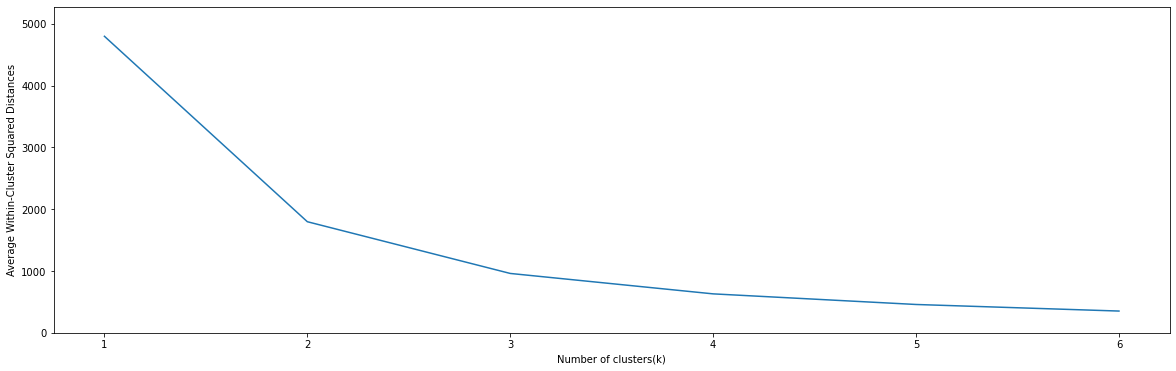

In [973]:
inertia = []
for n_clusters in range(1, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(step1_df)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 7), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

# Step 2

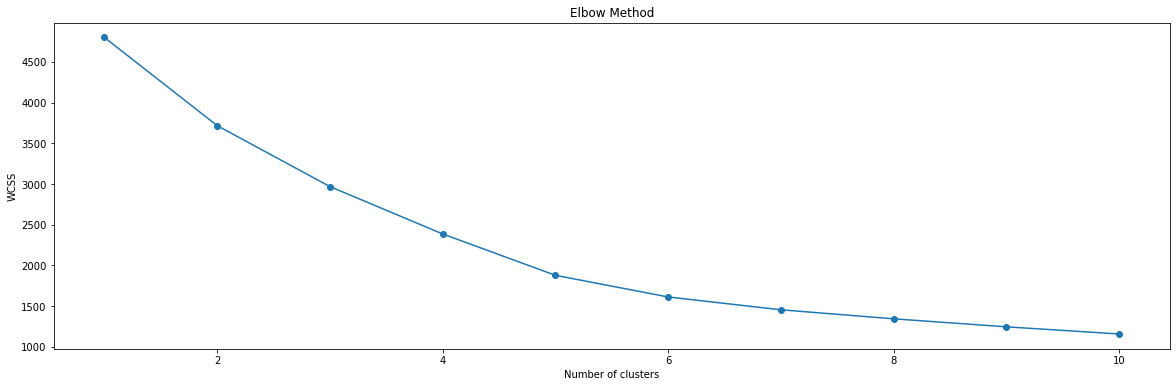

In [974]:
# From Web 1, Not part of the assignment

# WCSS (within-cluster sums of squares)
#Using the Elbow Method to find the most convenient number of clusters.
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init=10, random_state = 42)
    kmeans.fit(step2_df)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
    
# Plot the number of clusters
plt.plot(range(1, 11), wcss, marker='o',)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

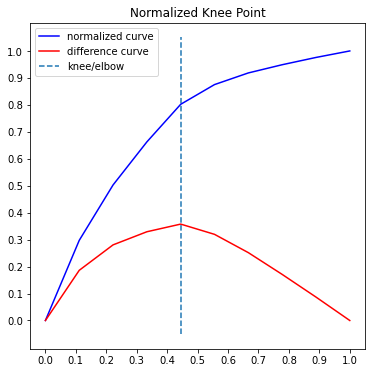

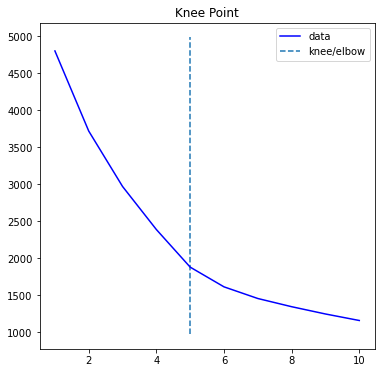

In [975]:
# From Web 2, Not part of the assignment

kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing", interp_method="interp1d")
kl.plot_knee_normalized()
kl.plot_knee()

In [976]:
# From Web 3, Not part of the assignment

#Displaying the ideal number of clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(step2_df)

kl.elbow

5

In [977]:
# Here you can see the individual members id's that belong to the various clusters
# Choose the number of clusters at: n_clusters=4

kmeans = KMeans(n_clusters=5, random_state=0).fit(step2_df)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=step2_df.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  1025070, 1037220, 1044140, 1047650, 1057550, 1060130, 1060150, 1065160, 1071800, 1075220, 1080330, 1081720, 1095130, 1095150, 1097370, 1101070, 1104380, 1106810, 1110370, 1111280, 1116000, 1116730, 1120150, 1121780, 1125100, 1125140, 1137070, 1140670, 1146060, 1146840, 1150400, 1150620, 1150750, 1151420, 1151830, 1152050, 1155080, 1155580, 1156240, 1156970, 1157190, 1157320, 1157830, 1160140, 1160540, 1162150, 1162360, 1162660, 1162680, 1162960, 1165100, 1165160, 1165390, 1165720, 1166870, 1167090, 1167350
1 :  1010010, 1010020, 1017020, 1017110, 1017360, 1020070, 1024050, 1024100, 1024120, 1024220, 1024400, 1027480, 1027540, 1030200, 1034220, 1035020, 1037120, 1037290, 1037720, 1037850, 1038000, 1038080, 1040150, 1040250, 1040340, 1044370, 1045030, 1045120, 1047220, 1047750, 1047870, 1054110, 1055060, 1055160, 1055330, 1057280, 1057410, 1057500, 1057800, 1058000, 1058010, 1058370, 1060050, 1060370, 1060420, 1060650, 1060760, 1060920, 1060980, 1061080, 1061310, 1061400, 1061660, 1

In [978]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=step2_df.columns)
pd.set_option('precision', 3)
print(centroids)
pd.set_option('precision', 6)

   Pur_Vol_No_Promo_-_%  Pur_Vol_Promo_6_%  Pur_Vol_Other_Promo_%  Pr_Cat_1  \
0                 5.393              2.711                  1.449     1.135   
1                 7.974              0.320                  0.255     0.586   
2                 7.882              0.152                  0.625     0.224   
3                 7.532              0.823                  0.337     0.458   
4                 7.814              0.367                  0.459     2.643   

   Pr_Cat_2  Pr_Cat_3  Pr_Cat_4  MaxPropCat  
0     1.790     0.112     0.490       1.919  
1     2.372     0.206     0.220       1.739  
2     0.512     2.831     0.103       4.157  
3     0.510     0.257     3.361       1.500  
4     0.739     0.050     0.077       1.999  


In [979]:
# From the book

withinClusterSS = [0] * 6
clusterCount = [0] * 7
for cluster, distance in zip(kmeans.labels_, kmeans.transform(step2_df)):
    withinClusterSS[cluster] += distance[cluster]**2
    clusterCount[cluster] += 1
for cluster, withClustSS in enumerate(withinClusterSS):
    print('Cluster {} ({} members): {:5.2f} within cluster'.format(cluster, 
        clusterCount[cluster], withinClusterSS[cluster]))

Cluster 0 (57 members): 638.27 within cluster
Cluster 1 (292 members): 516.13 within cluster
Cluster 2 (80 members): 246.50 within cluster
Cluster 3 (50 members): 177.27 within cluster
Cluster 4 (121 members): 300.40 within cluster
Cluster 5 (0 members):  0.00 within cluster


In [980]:
# calculate the distances of each data point to the cluster centers
distances = kmeans.transform(step2_df)

# reduce to the minimum squared distance of each data point to the cluster centers
minSquaredDistances = distances.min(axis=1) ** 2

# combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmeans.labels_}, 
    index=step2_df.index)

# Group by cluster and print information
for cluster, data in df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')

Cluster 0 (57 members): 638.27 within cluster 
Cluster 1 (292 members): 516.13 within cluster 
Cluster 2 (80 members): 246.50 within cluster 
Cluster 3 (50 members): 177.27 within cluster 
Cluster 4 (121 members): 300.40 within cluster 


,Pur_Vol_No_Promo_-_%,Pur_Vol_Promo_6_%,Pur_Vol_Other_Promo_%,Pr_Cat_1,Pr_Cat_2,Pr_Cat_3,Pr_Cat_4,MaxPropCat,cluster
0,5.393131,2.710961,1.449264,1.135397,1.790317,0.112136,0.490497,1.919007,Cluster 0
1,7.973776,0.319524,0.254762,0.586421,2.371581,0.205517,0.219519,1.739000,Cluster 1
2,7.881521,0.151791,0.624568,0.223529,0.511619,2.831497,0.102751,4.157459,Cluster 2
3,7.532219,0.822895,0.337478,0.458223,0.510218,0.256973,3.361073,1.499946,Cluster 3
4,7.813901,0.366797,0.459077,2.642965,0.738932,0.050413,0.076720,1.999079,Cluster 4


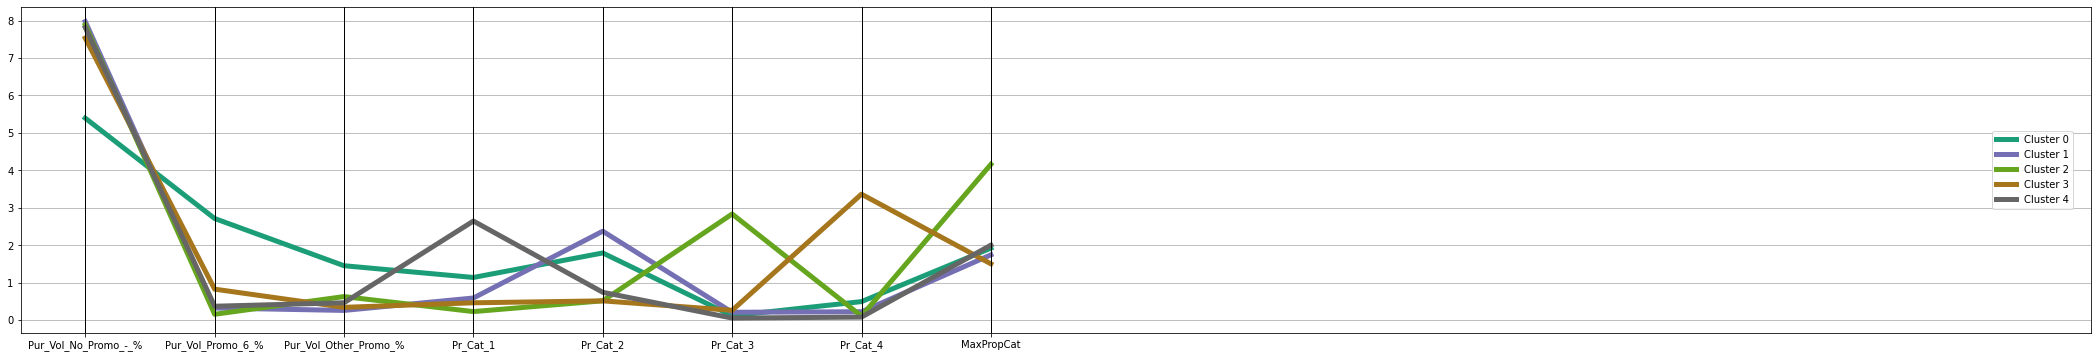

In [981]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]

fig = plt.figure(figsize=(10, 6))
#plt.figure(figsize=(10,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,15.5)
centroids
#plt.show()

In [982]:
# Here we see the clusters for our variables of interest only

step2_df.groupby(kmeans.labels_).mean()

,Pur_Vol_No_Promo_-_%,Pur_Vol_Promo_6_%,Pur_Vol_Other_Promo_%,Pr_Cat_1,Pr_Cat_2,Pr_Cat_3,Pr_Cat_4,MaxPropCat
0,5.393131,2.710961,1.449264,1.135397,1.790317,0.112136,0.490497,1.919007
1,7.973776,0.319524,0.254762,0.586421,2.371581,0.205517,0.219519,1.739000
2,7.881521,0.151791,0.624568,0.223529,0.511619,2.831497,0.102751,4.157459
3,7.532219,0.822895,0.337478,0.458223,0.510218,0.256973,3.361073,1.499946
4,7.813901,0.366797,0.459077,2.642965,0.738932,0.050413,0.076720,1.999079


In [983]:
# Here we see the clusters for all the variables in the dataframe

# Showing all columns
pd.set_option('display.max_columns', None)

norm_df.groupby(kmeans.labels_).mean()

,Socio_Economic_Class,Food_eating_habits,Native_language,SEX,AGE,EDU,Household_members,CHILD,CS,Affluence_Index,No_of_Brands,Brand_Runs,Total_Volume,No_of__Trans,Value,Trans_/_Brand_Runs,Vol/Tran,Avg_Price,Pur_Vol_No_Promo_-_%,Pur_Vol_Promo_6_%,Pur_Vol_Other_Promo_%,"Br_Cd_57,_144",Br_Cd_55,Br_Cd_272,Br_Cd_286,Br_Cd_24,Br_Cd_481,Br_Cd_352,Br_Cd_5,Max_brand,Others_999,Pr_Cat_1,Pr_Cat_2,Pr_Cat_3,Pr_Cat_4,PropCat_5,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15,MaxProp,MaxPropCat
0,1.883005,1.469700,1.737599,2.788741,3.915464,2.044479,1.763415,2.971834,2.041799,1.786615,2.567569,2.019911,1.245791,1.857887,1.356988,0.629621,1.287446,3.427795,5.393131,2.710961,1.449264,0.537581,0.095890,1.214288,0.157814,0.179343,0.515220,0.279313,0.178689,0.926774,2.065520,1.135397,1.790317,0.112136,0.490497,1.392898,0.353294,0.425100,1.317353,0.664484,0.441200,0.508278,0.374603,0.193237,0.104132,0.406633,2.814110,1.919007
1,2.217689,1.878398,1.978468,2.780025,3.706754,1.967296,1.894000,2.531681,1.850988,1.553335,2.499509,1.601587,1.675408,1.871958,1.649809,0.901974,1.740522,3.045465,7.973776,0.319524,0.254762,1.136196,0.180215,0.343874,0.506181,0.080686,0.400614,0.479712,0.157754,1.362465,1.632865,0.586421,2.371581,0.205517,0.219519,1.758616,0.586059,0.537401,0.417465,0.525285,0.119283,0.422745,0.199718,0.079568,0.198849,0.326617,3.263206,1.739000
2,2.985151,1.840799,1.826472,2.449963,3.512506,1.142503,1.854735,2.795832,1.775327,0.810267,1.948185,0.872417,1.667921,1.496032,1.038369,1.889521,2.118273,1.920290,7.881521,0.151791,0.624568,0.232709,2.811882,0.100685,0.063546,0.033094,0.072936,0.019572,0.161984,2.560077,0.594053,0.223529,0.511619,2.831497,0.102751,0.353848,0.350385,0.061386,0.078396,0.349143,0.011127,0.067531,0.074815,0.027657,2.829835,0.225268,3.709999,4.157459
3,3.005275,2.186914,2.321105,2.808776,3.792929,1.498964,2.045103,2.499803,2.209296,1.149066,1.799299,1.311152,1.721842,1.636734,1.300017,0.962762,2.035795,2.365116,7.532219,0.822895,0.337478,0.303935,0.208351,0.088972,0.145146,0.015460,0.067223,0.029599,0.066572,0.431183,2.808463,0.458223,0.510218,0.256973,3.361073,2.377969,0.172679,0.176669,0.494139,0.416128,0.054187,0.061006,0.031158,0.012921,0.239683,0.088519,3.720368,1.499946
4,1.633623,1.610597,1.691004,2.499864,3.746291,2.077278,1.571497,2.793114,1.597631,1.802143,2.151996,1.584024,1.165519,1.813530,1.671004,0.867408,1.231820,4.481647,7.813901,0.366797,0.459077,0.584009,0.046285,0.303767,0.094527,0.894618,0.154175,0.083158,0.729670,0.862638,2.246113,2.642965,0.738932,0.050413,0.076720,1.055231,0.870936,0.846085,0.723154,0.450388,0.785459,0.150657,0.451849,0.989957,0.046986,0.273744,3.004478,1.999079


In [984]:
print(pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')))

          0         1         2         3         4
0  0.000000  3.815669  5.333298  4.462127  3.986892
1  3.815669  0.000000  4.064838  3.723636  2.660178
2  5.333298  4.064838  0.000000  5.001711  4.286869
3  4.462127  3.723636  5.001711  0.000000  4.025710
4  3.986892  2.660178  4.286869  4.025710  0.000000


In [985]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')).sum(axis=0)

0    17.597985
1    14.264320
2    18.686715
3    17.213183
4    14.959648
dtype: float64

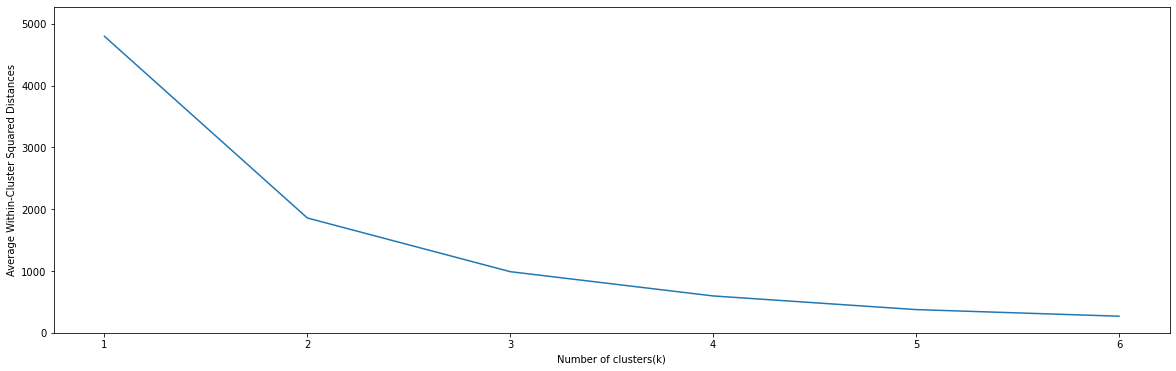

In [986]:
inertia = []
for n_clusters in range(1, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(step2_df)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 7), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

# Step 3

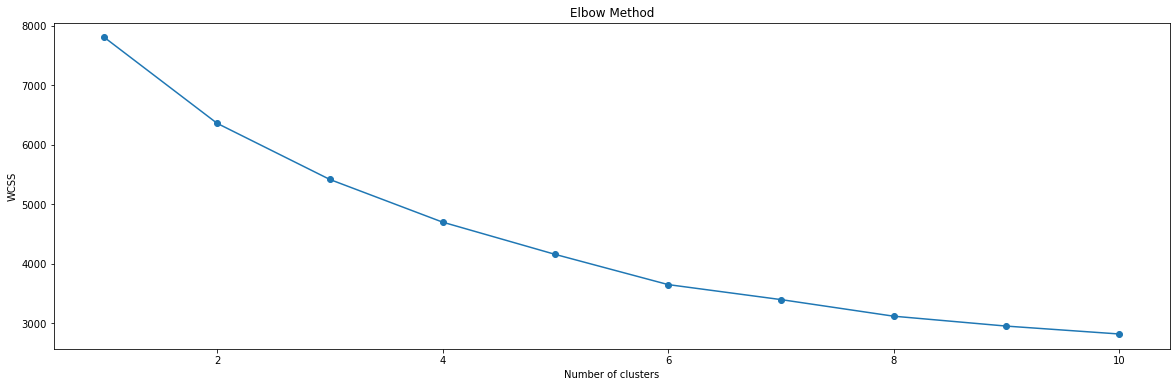

In [987]:
# From Web 1, Not part of the assignment

# WCSS (within-cluster sums of squares)
#Using the Elbow Method to find the most convenient number of clusters.
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init=10, random_state = 42)
    kmeans.fit(step3_df)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
    
# Plot the number of clusters
plt.plot(range(1, 11), wcss, marker='o',)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

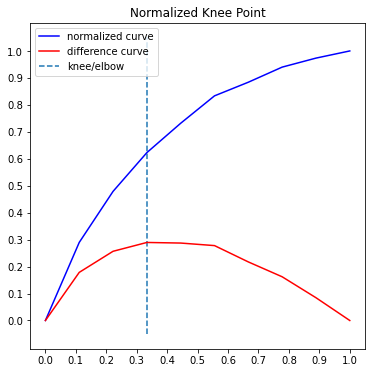

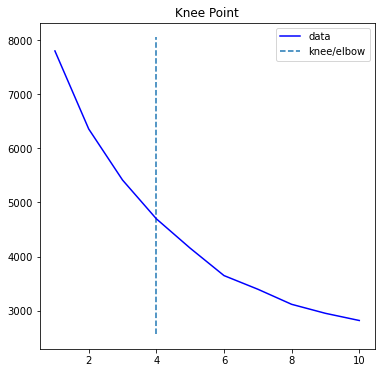

In [988]:
# From Web 2, Not part of the assignment

kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing", interp_method="interp1d")
kl.plot_knee_normalized()
kl.plot_knee()

In [989]:
# From Web 3, Not part of the assignment

#Displaying the ideal number of clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(step3_df)

kl.elbow

4

In [990]:
# Here you can see the individual members id's that belong to the various clusters
# Choose the number of clusters at: n_clusters=4

kmeans = KMeans(n_clusters=5, random_state=0).fit(step3_df)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=step3_df.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  1014190, 1017490, 1020210, 1024630, 1025070, 1027580, 1027750, 1028050, 1028110, 1028230, 1034130, 1034350, 1040190, 1040370, 1044140, 1047210, 1047650, 1047760, 1057580, 1058190, 1060130, 1060150, 1060590, 1061820, 1061830, 1065080, 1070670, 1075060, 1075280, 1077300, 1077480, 1080020, 1080250, 1080820, 1081720, 1085340, 1094030, 1097370, 1101070, 1104380, 1104510, 1104630, 1105830, 1105890, 1106440, 1110370, 1110970, 1111180, 1116000, 1116570, 1116730, 1121780, 1125100, 1125280, 1146840, 1147430, 1148280, 1150720, 1150750, 1151420, 1157070, 1157580, 1157830, 1160540, 1162680, 1162960, 1165390, 1167350
1 :  1017460, 1045030, 1047610, 1047980, 1050210, 1054310, 1060230, 1061130, 1061380, 1061580, 1062270, 1065660, 1075730, 1080470, 1080590, 1081140, 1081640, 1085220, 1085630, 1090040, 1097530, 1105370, 1105580, 1106180, 1106570, 1110140, 1110290, 1110540, 1116580, 1120250, 1120560, 1120690, 1120870, 1121270, 1121440, 1121660, 1125190, 1125480, 1125910, 1134090, 1135240, 1135320, 1

In [991]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=step3_df.columns)
pd.set_option('precision', 3)
print(centroids)
pd.set_option('precision', 6)

   Others_999  Max_brand  No_of_Brands  MaxPropCat  Pur_Vol_No_Promo_-_%  \
0       2.647      0.580         1.780       1.626                 6.500   
1       2.351      0.854         1.768       2.072                 7.876   
2       0.501      2.676         1.814       4.150                 7.865   
3       1.386      1.717         2.032       1.773                 8.001   
4       2.055      0.758         3.328       1.845                 7.479   

   Pr_Cat_1  Pr_Cat_2  Pr_Cat_3  Pr_Cat_4  Pur_Vol_Promo_6_%  \
0     0.617     0.846     0.225     2.628              1.679   
1     2.815     0.609     0.039     0.053              0.310   
2     0.208     0.413     2.958     0.109              0.140   
3     0.452     2.527     0.197     0.177              0.281   
4     1.140     1.806     0.224     0.301              0.807   

   Pur_Vol_Other_Promo_%  Brand_Runs  No_of__Trans  
0                  0.946       1.234         1.423  
1                  0.429       1.145         1.335  

In [992]:
# From the book

withinClusterSS = [0] * 6
clusterCount = [0] * 7
for cluster, distance in zip(kmeans.labels_, kmeans.transform(step3_df)):
    withinClusterSS[cluster] += distance[cluster]**2
    clusterCount[cluster] += 1
for cluster, withClustSS in enumerate(withinClusterSS):
    print('Cluster {} ({} members): {:5.2f} within cluster'.format(cluster, 
        clusterCount[cluster], withinClusterSS[cluster]))

Cluster 0 (68 members): 1138.74 within cluster
Cluster 1 (91 members): 542.34 within cluster
Cluster 2 (73 members): 376.40 within cluster
Cluster 3 (198 members): 930.83 within cluster
Cluster 4 (170 members): 1166.35 within cluster
Cluster 5 (0 members):  0.00 within cluster


In [993]:
# calculate the distances of each data point to the cluster centers
distances = kmeans.transform(step3_df)

# reduce to the minimum squared distance of each data point to the cluster centers
minSquaredDistances = distances.min(axis=1) ** 2

# combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmeans.labels_}, 
    index=step3_df.index)

# Group by cluster and print information
for cluster, data in df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')

Cluster 0 (68 members): 1138.74 within cluster 
Cluster 1 (91 members): 542.34 within cluster 
Cluster 2 (73 members): 376.40 within cluster 
Cluster 3 (198 members): 930.83 within cluster 
Cluster 4 (170 members): 1166.35 within cluster 


,Others_999,Max_brand,No_of_Brands,MaxPropCat,Pur_Vol_No_Promo_-_%,Pr_Cat_1,Pr_Cat_2,Pr_Cat_3,Pr_Cat_4,Pur_Vol_Promo_6_%,Pur_Vol_Other_Promo_%,Brand_Runs,No_of__Trans,cluster
0,2.647424,0.579690,1.779547,1.626017,6.499592,0.616993,0.846125,0.224555,2.627731,1.678574,0.946224,1.234478,1.423063,Cluster 0
1,2.350880,0.853772,1.768387,2.071767,7.875935,2.814577,0.609071,0.038534,0.052948,0.310443,0.428901,1.144621,1.334757,Cluster 1
2,0.500555,2.676486,1.813880,4.150048,7.864518,0.207589,0.412866,2.958348,0.109255,0.139825,0.668247,0.745078,1.375155,Cluster 2
3,1.385588,1.717165,2.031859,1.772604,8.000834,0.451750,2.526725,0.196958,0.176638,0.281210,0.259341,1.098315,1.427610,Cluster 3
4,2.055390,0.758330,3.328033,1.844853,7.478873,1.140364,1.805931,0.224339,0.300946,0.807153,0.446362,2.646200,2.777549,Cluster 4


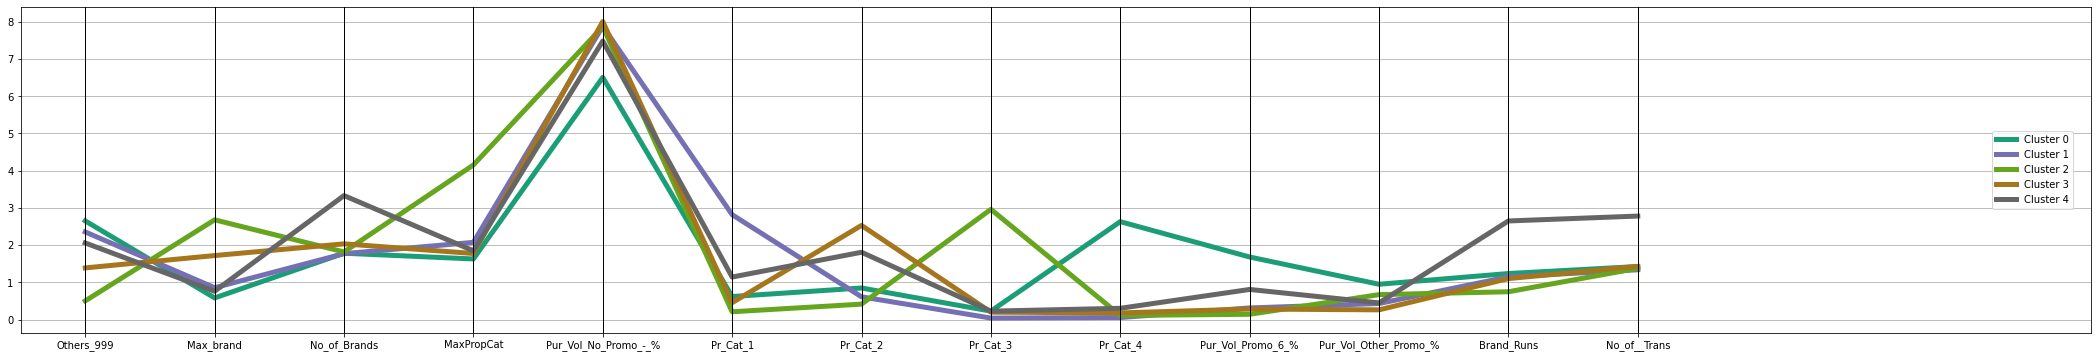

In [994]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]

fig = plt.figure(figsize=(10, 6))
#plt.figure(figsize=(10,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,15.5)
centroids
#plt.show()

In [995]:
# Here we see the clusters for our variables of interest only

step3_df.groupby(kmeans.labels_).mean()

,Others_999,Max_brand,No_of_Brands,MaxPropCat,Pur_Vol_No_Promo_-_%,Pr_Cat_1,Pr_Cat_2,Pr_Cat_3,Pr_Cat_4,Pur_Vol_Promo_6_%,Pur_Vol_Other_Promo_%,Brand_Runs,No_of__Trans
0,2.647424,0.579690,1.779547,1.626017,6.499592,0.616993,0.846125,0.224555,2.627731,1.678574,0.946224,1.234478,1.423063
1,2.350880,0.853772,1.768387,2.071767,7.875935,2.814577,0.609071,0.038534,0.052948,0.310443,0.428901,1.144621,1.334757
2,0.500555,2.676486,1.813880,4.150048,7.864518,0.207589,0.412866,2.958348,0.109255,0.139825,0.668247,0.745078,1.375155
3,1.385588,1.717165,2.031859,1.772604,8.000834,0.451750,2.526725,0.196958,0.176638,0.281210,0.259341,1.098315,1.427610
4,2.055390,0.758330,3.328033,1.844853,7.478873,1.140364,1.805931,0.224339,0.300946,0.807153,0.446362,2.646200,2.777549


In [996]:
# Here we see the clusters for all the variables in the dataframe

# Showing all columns
pd.set_option('display.max_columns', None)

norm_df.groupby(kmeans.labels_).mean()

,Socio_Economic_Class,Food_eating_habits,Native_language,SEX,AGE,EDU,Household_members,CHILD,CS,Affluence_Index,No_of_Brands,Brand_Runs,Total_Volume,No_of__Trans,Value,Trans_/_Brand_Runs,Vol/Tran,Avg_Price,Pur_Vol_No_Promo_-_%,Pur_Vol_Promo_6_%,Pur_Vol_Other_Promo_%,"Br_Cd_57,_144",Br_Cd_55,Br_Cd_272,Br_Cd_286,Br_Cd_24,Br_Cd_481,Br_Cd_352,Br_Cd_5,Max_brand,Others_999,Pr_Cat_1,Pr_Cat_2,Pr_Cat_3,Pr_Cat_4,PropCat_5,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15,MaxProp,MaxPropCat
0,2.709588,1.776608,1.960300,2.655356,3.775243,1.505416,1.778907,2.757136,2.059611,1.131265,1.779547,1.234478,1.439231,1.423063,1.137583,0.846015,1.866620,2.597711,6.499592,1.678574,0.946224,0.347034,0.184057,0.415126,0.145313,0.044271,0.131158,0.070687,0.085845,0.579690,2.647424,0.616993,0.846125,0.224555,2.627731,2.149707,0.255441,0.210037,0.719930,0.392207,0.129807,0.147186,0.252783,0.043477,0.207514,0.139841,3.563906,1.626017
1,1.602106,1.453550,1.557032,2.323405,3.672462,1.903335,1.396236,2.873545,1.495697,1.620317,1.768387,1.144621,0.930667,1.334757,1.366498,0.890053,1.282293,4.550754,7.875935,0.310443,0.428901,0.558849,0.039600,0.166726,0.079060,0.895594,0.099533,0.080013,0.670678,0.853772,2.350880,2.814577,0.609071,0.038534,0.052948,1.084181,0.810666,0.975560,0.646640,0.372337,0.826438,0.100312,0.317586,1.025988,0.038660,0.230607,3.251695,2.071767
2,3.014097,1.787800,1.790917,2.388918,3.469142,1.101811,1.770317,2.827373,1.756412,0.766604,1.813880,0.745078,1.620894,1.375155,0.972911,1.997438,2.156381,1.873504,7.864518,0.139825,0.668247,0.227968,2.939741,0.087917,0.061274,0.023652,0.051347,0.012915,0.171131,2.676486,0.500555,0.207589,0.412866,2.958348,0.109255,0.329783,0.332434,0.045699,0.066104,0.341692,0.008072,0.048067,0.071296,0.019767,2.955445,0.060772,3.844315,4.150048
3,2.267689,1.821537,1.930252,2.743615,3.714435,1.906480,1.883358,2.620574,1.803222,1.459258,2.031859,1.098315,1.581099,1.427610,1.543143,1.004546,2.008575,3.018131,8.000834,0.281210,0.259341,1.369707,0.171727,0.440467,0.537877,0.026322,0.492478,0.535152,0.119970,1.717165,1.385588,0.451750,2.526725,0.196958,0.176638,1.904590,0.453347,0.473563,0.414568,0.340588,0.140214,0.514707,0.145252,0.028839,0.187949,0.314646,3.644450,1.772604
4,2.015092,1.997063,2.091900,2.941317,3.822858,2.207047,2.024627,2.476585,2.007396,1.920441,3.328033,2.646200,1.804950,2.777549,1.947545,0.707552,1.195213,3.374704,7.478873,0.807153,0.446362,0.615252,0.201968,0.481493,0.309004,0.317673,0.323310,0.294787,0.339476,0.758330,2.055390,1.140364,1.805931,0.224339,0.300946,1.304569,0.753788,0.571250,0.710352,0.832710,0.271969,0.320810,0.363722,0.314220,0.220384,0.452294,2.465497,1.844853


In [997]:
print(pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')))

          0         1         2         3         4
0  0.000000  3.995142  5.839437  4.065500  3.902948
1  3.995142  0.000000  5.165121  3.345574  3.413645
2  5.839437  5.165121  0.000000  4.460322  5.499993
3  4.065500  3.345574  4.460322  0.000000  2.977506
4  3.902948  3.413645  5.499993  2.977506  0.000000


In [998]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')).sum(axis=0)

0    17.803027
1    15.919482
2    20.964874
3    14.848902
4    15.794092
dtype: float64

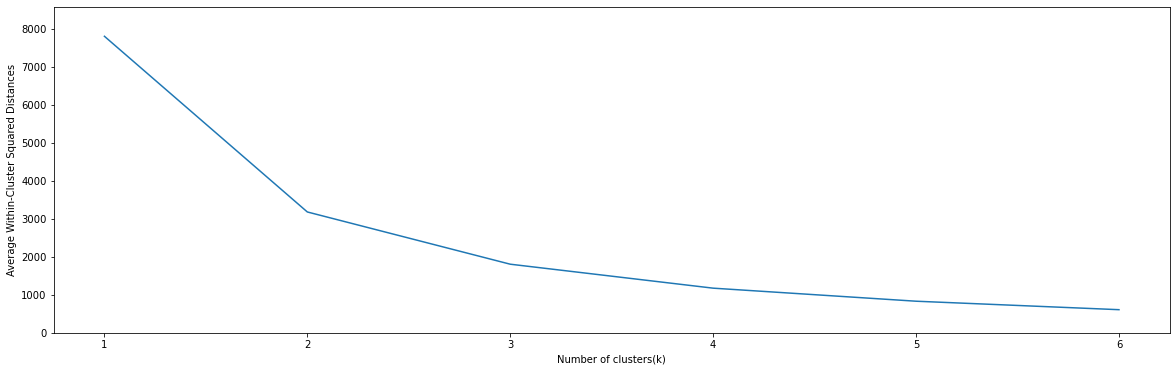

In [999]:
inertia = []
for n_clusters in range(1, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(step3_df)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 7), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()